In [1]:
import pandas as pd
import numpy as np
GBQ_PROJECT_ID = '620265099307'

import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import verbose
#verbose.level = 'helpful'      # one of silent, helpful, debug, debug-annoying

from stldecompose import decompose

C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
q = '''
SELECT
  p.practice,
  pct,
  p.month,
  SUM(items) AS items,
  AVG(total_list_size) AS list_size,
  CAST(JSON_EXTRACT(MAX(star_pu), '$.oral_antibacterials_item') AS FLOAT64) AS star_pu_items
FROM
  ebmdatalab.alex.antibiotic_prescribing_to_feb_18 p
INNER JOIN
  ebmdatalab.hscic.practices prac
ON
  p.practice = prac.code
LEFT JOIN
  ebmdatalab.hscic.practice_statistics_all_years stat
ON
  p.practice = stat.practice
  AND p.month = stat.month
LEFT JOIN
  ebmdatalab.hscic.presentation r
ON
  p.bnf_code = r.bnf_code
GROUP BY
  practice,
  pct,
  setting,
  month
ORDER BY
  practice,
  month
'''

all_antibiotics = pd.read_gbq(q, GBQ_PROJECT_ID, verbose=False, dialect='standard')
all_antibiotics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818363 entries, 0 to 818362
Data columns (total 6 columns):
practice         818363 non-null object
pct              811880 non-null object
month            818363 non-null datetime64[ns]
items            818363 non-null int32
list_size        734720 non-null float64
star_pu_items    734720 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 34.3+ MB


In [3]:
pd.options.display.max_rows = 100

In [4]:
totals = all_antibiotics.groupby('month').sum()
totals = totals.loc['2010-10-01':'2018-02-01']
totals['items_per_star_pu'] = totals['items'] / (totals['star_pu_items']/1000)
totals

,items,list_size,star_pu_items,items_per_star_pu
month,,,,
2010-10-01,3058208,55208091.0,3.077908e+07,99.359957
2010-11-01,3201713,55211267.0,3.078087e+07,104.016318
2010-12-01,4095170,55204420.0,3.077666e+07,133.060888
2011-01-01,3465222,55244451.0,3.082144e+07,112.428946
2011-02-01,3030377,55248337.0,3.082421e+07,98.311576
2011-03-01,3468823,55243497.0,3.082133e+07,112.546193
2011-04-01,2801389,55257566.0,3.085441e+07,90.793800
2011-05-01,2726241,55255745.0,3.085340e+07,88.361129
2011-06-01,2805170,55234905.0,3.084268e+07,90.950911


In [5]:
res = decompose(totals['items_per_star_pu'], period=12, lo_frac=0.6, lo_delta=0.0)
res = res.trend
res

month
2010-10-01    100.933806
2010-11-01    100.897901
2010-12-01    100.861654
2011-01-01    100.824839
2011-02-01    100.787009
2011-03-01    100.747472
2011-04-01    100.705449
2011-05-01    100.659989
2011-06-01    100.610255
2011-07-01    100.555639
2011-08-01    100.495768
2011-09-01    100.430559
2011-10-01    100.360259
2011-11-01    100.285421
2011-12-01    100.206846
2012-01-01    100.125462
2012-02-01    100.042204
2012-03-01     99.958030
2012-04-01     99.873938
2012-05-01     99.791016
2012-06-01     99.710751
2012-07-01     99.635098
2012-08-01     99.566929
2012-09-01     99.510325
2012-10-01     99.471046
2012-11-01     99.455924
2012-12-01     99.468304
2013-01-01     99.375173
2013-02-01     99.272644
2013-03-01     99.156787
2013-04-01     99.022456
2013-05-01     98.864382
2013-06-01     98.677506
2013-07-01     98.460354
2013-08-01     98.212734
2013-09-01     97.936076
2013-10-01     97.635084
2013-11-01     97.316619
2013-12-01     96.988923
2014-01-01     96.6

In [6]:
totals.to_csv('total_antibiotic_prescribing.csv')

In [7]:
# import STAR-PU multipliers and population sizes from BigQuery:
q = '''SELECT * 
FROM ebmdatalab.ONS.oral_antibiotics_star_pu'''
q2 = '''SELECT *
FROM ebmdatalab.ONS.england_population_1998_2016 
'''

m = pd.read_gbq(q, GBQ_PROJECT_ID, dialect='standard',verbose=False)
pop = pd.read_gbq(q2, GBQ_PROJECT_ID, dialect='standard',verbose=False).drop(["location","all_ages"],axis=1)

In [8]:
# create age-band groups
m = m.rename(columns={"Age_Band":"age_band"})
m["min_age"] = m["age_band"].str.split('-',expand=True)[0].str.replace("+","").astype(int)
m = m.sort_values(by="min_age") # this sorted table will be used in the next step (1b)

# rearrange data
m2 = pd.DataFrame(m[["age_band","item_male","item_female","cost_male","cost_female"]].set_index("age_band").unstack()).reset_index().sort_values(by="age_band")
m2 = m2.rename(columns={"level_0":"category",0:"multiplier"})

# split gender and items vs cost into separate columns
m2["measure"] = m2["category"].str.split('_',expand=True)[0]
m2["gender"] = m2["category"].str.split('_',expand=True)[1]

# rearrange table
m2 = m2.drop("category",axis=1)
m2 = m2.set_index(["age_band","gender","measure"]).unstack().reset_index(col_level=1)
m2.columns = m2.columns.droplevel()
m2.head()

measure,age_band,gender,cost,item
0,0-4,female,2.8,0.8
1,0-4,male,3.2,0.8
2,15-24,female,2.5,0.6
3,15-24,male,2.1,0.3
4,25-34,female,2.0,0.6


In [9]:
# rearrange population data:
p2 = pd.DataFrame(pop.set_index(["year","gender"]).stack()).reset_index()
p2["gender"] = p2.gender.str.lower()
p2 = p2.rename(columns={"level_2":"_age",0:"population"})
p2["age"] = p2["_age"].str.replace("_","").astype(int)

# Group into age bands
conditions = [
    (p2['age']<5 ),
    (p2['age']<15 ),
    (p2['age']<25 ),
    (p2['age']<35 ),
    (p2['age']<45 ),
    (p2['age']<55 ),
    (p2['age']<65 ),
    (p2['age']<75 ),
    (p2['age']>=75)]
choices = m["age_band"].drop_duplicates().values # assign each age to an age band from the table formed above
p2['age_band'] = np.select(conditions, choices)

p3 = pd.DataFrame(p2.groupby(["year","age_band","gender"])["population"].sum()).reset_index()
# join to STAR-PU multipliers:
p3 = p3.merge(m2,on=["age_band","gender"])
p3["item_star-pu"] = p3.population*p3.item
p3["cost_star-pu"] = p3.population*p3.cost
starpu = pd.DataFrame(p3.groupby(["year"])["item_star-pu","cost_star-pu"].sum()).reset_index()
starpu#.head()

,year,item_star-pu,cost_star-pu
0,1998,26914610.0,111491490.0
1,1999,27018730.0,111926740.0
2,2000,27127640.0,112364760.0
3,2001,27249436.5,112905819.5
4,2002,27392281.2,113551221.2
5,2003,27547207.4,114240730.8
6,2004,27715678.5,114968844.1
7,2005,27956819.3,115953712.4
8,2006,28178088.7,116859606.9
9,2007,28446408.2,117958881.2


In [10]:
q = """
SELECT
  year,
  SUM(items) AS items
FROM
  ebmdatalab.helen.trends_from_pca_final_2016 p
WHERE
  chapter_code_current = '05'
  AND section_code_current = '01'
GROUP BY
  year
ORDER BY
  year
"""

prescribing = pd.read_gbq(q, GBQ_PROJECT_ID, dialect='standard',verbose=False)

In [11]:
prescribing['items_per_star-pu'] = prescribing['items'] / (starpu['item_star-pu']/1000)
prescribing

,year,items,items_per_star-pu
0,1998,42615600.0,1583.363088
1,1999,38637200.0,1430.015400
2,2000,36875908.1,1359.348181
3,2001,37914029.0,1391.369286
4,2002,36948880.0,1348.879260
5,2003,37597529.0,1364.839944
6,2004,36463038.0,1315.610513
7,2005,37240737.0,1332.080613
8,2006,37175639.0,1319.310170
9,2007,39175949.0,1377.184379


In [12]:
prescribing.to_csv('pca_totals.csv')

In [13]:
dates = pd.to_datetime(prescribing.year,format='%Y') #+ pd.DateOffset(months=6)
prescribing = prescribing.set_index(dates)
prescribing

,year,items,items_per_star-pu
year,,,
1998-01-01,1998,42615600.0,1583.363088
1999-01-01,1999,38637200.0,1430.015400
2000-01-01,2000,36875908.1,1359.348181
2001-01-01,2001,37914029.0,1391.369286
2002-01-01,2002,36948880.0,1348.879260
2003-01-01,2003,37597529.0,1364.839944
2004-01-01,2004,36463038.0,1315.610513
2005-01-01,2005,37240737.0,1332.080613
2006-01-01,2006,37175639.0,1319.310170


In [15]:
pred_long_term = pd.read_csv('pred_long_term.csv',index_col = 'year',parse_dates = ['year'])
pred_monthly = pd.read_csv('pred_monthly.csv',index_col = 'month',parse_dates = ['month'])


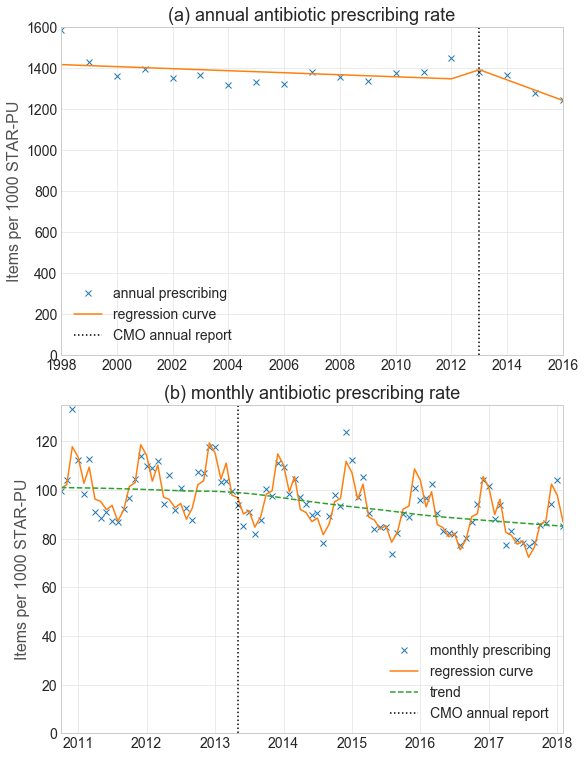

In [16]:
sns.set_style("whitegrid",{'grid.color': '.9'})

fig = plt.figure(figsize=(9,13))
gs = gridspec.GridSpec(2,1)  # grid layout for subplots

ax = plt.subplot(gs[0,0])
ax.plot(prescribing['items_per_star-pu'],'x',label='annual prescribing')
ax.plot(pred_long_term,label='regression curve')

ax.axvline(color='k',linestyle=':',x='2013-01-01',label='CMO annual report')
#ax.axvline(linestyle=':',x='2013-09-01',label='antimicrobial resistance strategy')

ax.set_ylabel('Items per 1000 STAR-PU', size =16, alpha=0.8)
ax.set_title('(a) annual antibiotic prescribing rate',size = 18)
ax.tick_params(labelsize=14)
ax.set_xlim(['1998-01-01','2016-01-01']) # set x axis range as full date range
ax.set_ylim([0,1600])
ax.legend(prop={'size': 14})

############
ax = plt.subplot(gs[1,0])
ax.plot(totals['items_per_star_pu'],'x',label='monthly prescribing')
ax.plot(pred_monthly,label='regression curve')
ax.plot(res,'--',label='trend')

ax.axvline(color='k',linestyle=':',x='2013-05-01',label='CMO annual report')
#ax.axvline(linestyle=':',x='2013-09-01',label='antimicrobial resistance strategy')

ax.set_ylabel('Items per 1000 STAR-PU', size =16, alpha=0.8)
ax.set_title('(b) monthly antibiotic prescribing rate',size = 18)
ax.tick_params(labelsize=14)
ax.set_xlim(['2010-10-01','2018-02-01']) # set x axis range as full date range
ax.set_ylim([0,135])
ax.legend(prop={'size': 14})

plt.subplots_adjust(wspace = 0.12,hspace = 0.15)

plt.savefig('ITSA_graph.png', format='png', dpi=300,bbox_inches='tight')
plt.show()